In [0]:
!pip install kaggle

In [0]:
!mkdir .kaggle

In [0]:
import json 
token = {"username":"ritesharmA","key":"9042c70ecf2a089458d61d06afb2f014"}
with open('/content/.kaggle/kaggle.json','w') as file :
  json.dump(token,file)

In [0]:
from google.colab import files
upload = files.upload()

Saving kaggle (2).json to kaggle (2).json


In [0]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 99% 669M/675M [00:10<00:00, 38.9MB/s]
100% 675M/675M [00:10<00:00, 66.7MB/s]


In [0]:
!unzip malaria-images.zip -d malaria-images

Archive:  malaria-images.zip
  inflating: malaria-images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png  
  inflating: malaria-images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png  
  inflating: malaria-images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png  
  inflating: malaria-images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png  
  inflating: malaria-images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png  
  inflating: malaria-images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png  
  inflating: malaria-images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_168.png  
  inflating: malaria-images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_169.png  
  inflating: malaria-images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_170.png  
  inflating: malaria-images/cell_images/Parasitized/C100P61ThinF_IMG_20

In [0]:
!rm -rf malaria-images/cell_images/cell_images

In [0]:
!pip install split-folders

In [0]:
# Splitting the folders for training and test sets
import split_folders

split_folders.ratio('malaria-images/cell_images', output="dataset", seed=1337, ratio=(.8, .1, .1))

Copying files: 27560 files [00:03, 7889.96 files/s]


In [0]:
# Importing important libraries

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
# Building our CNN model

model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))


model.add(Flatten())


model.add(Dense(512,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(2,activation="sigmoid"))  #2 represent output layer neurons
model.summary()

model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 50, 50, 32)        416       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 25, 25, 32)        4128      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 32)       

In [0]:
from keras.utils import to_categorical

In [0]:
# Image augmentation

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(50,50),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'dataset/val',
        target_size=(50,50),
        batch_size=32,
        class_mode='binary')

n_training_samples = len(train_generator.filenames)
n_validation_samples = len(validation_generator.filenames)

print(n_training_samples)
print(n_validation_samples)

Found 22046 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.
22046
2756


KeyboardInterrupt: ignored

In [0]:
# Fitting the model / training

history = model.fit_generator(
        train_generator,
        steps_per_epoch=74,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=30)

Epoch 1/30


ValueError: ignored

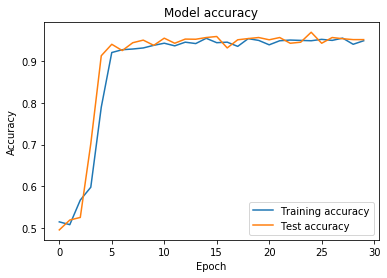

In [0]:
# Plotting the training and validation accuracy values
import matplotlib.pyplot as plt

ax = plt.subplots()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Test accuracy'], loc='lower right')
plt.show()

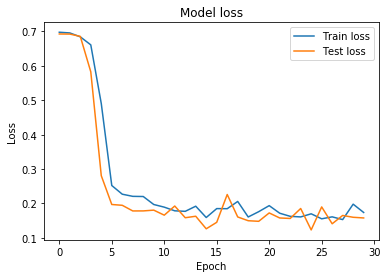

In [0]:
# Plotting the training and validatoin loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper right')
plt.show()

In [0]:
model.evaluate_generator(validation_generator, steps=25)

[0.15045577973127366, 0.9575]

In [0]:
test_datagen2 = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen2.flow_from_directory(
        'dataset/test',
        target_size=(50,50),
        batch_size=2756,
        class_mode='binary')


Found 2756 images belonging to 2 classes.


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
batch_size = 32
y_pred = model.predict_generator(test_generator, steps=n_validation_samples // batch_size + 1)
y_pred = np.argmax(y_pred, axis = 1)
print('Confusion matrix')
cm = confusion_matrix(validation_generator.classes, y_pred)
print(cm)
print('Classification report')
target_names = ['Parasitized', 'Uninfected']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion matrix
[[1378    0]
 [1378    0]]
Classification report
              precision    recall  f1-score   support

 Parasitized       0.50      1.00      0.67      1378
  Uninfected       0.00      0.00      0.00      1378

    accuracy                           0.50      2756
   macro avg       0.25      0.50      0.33      2756
weighted avg       0.25      0.50      0.33      2756



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


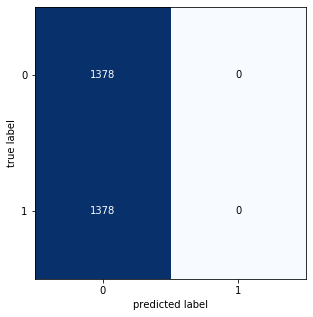

In [0]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat = cm, figsize = (5, 5))
plt.show()

In [0]:
import os

para_dir = "malaria-images/cell_images/Parasitized"
uninf_dir = "malaria-images/cell_images/Uninfected"

In [0]:
Pimages = os.listdir(para_dir)
Nimages = os.listdir(uninf_dir)

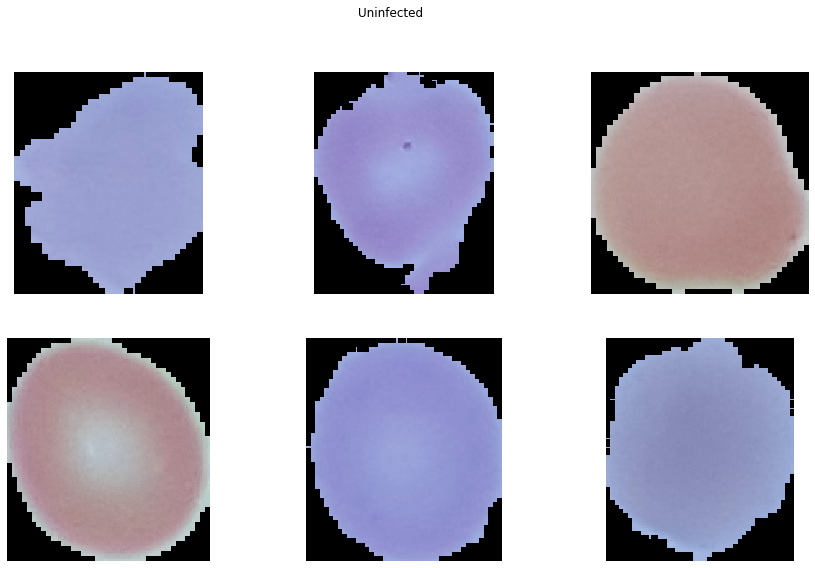

In [0]:
import cv2
import random

sample_normal = random.sample(Nimages, 6)
f, ax = plt.subplots(2, 3, figsize=(15, 9))

for i in range(0, 6):
  im = cv2.imread('malaria-images/cell_images/Uninfected/' + sample_normal[i])
  ax[i//3, i%3].imshow(im)
  ax[i//3, i%3].axis('off')

f.suptitle('Uninfected')
plt.show()

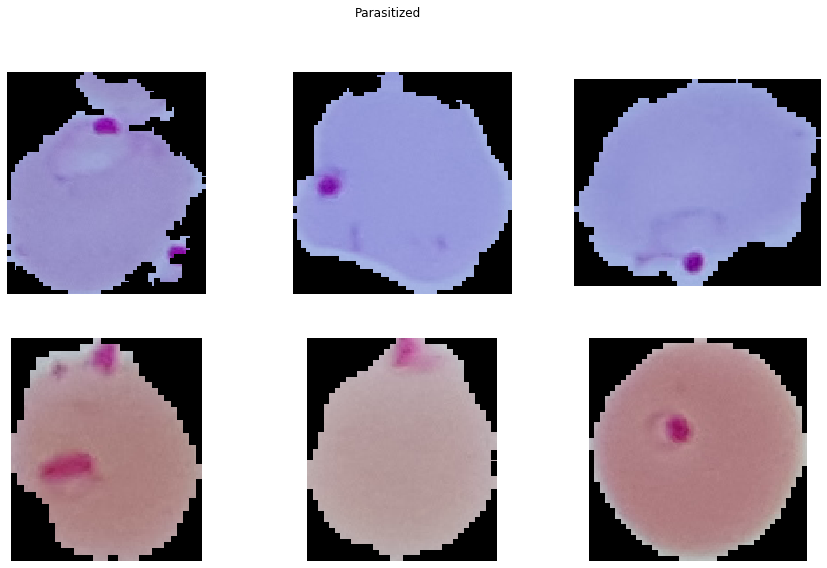

In [0]:
sample_parasite = random.sample(Pimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('malaria-images/cell_images/Parasitized/'+sample_parasite[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Parasitized')
plt.show()

In [0]:
x_test, y_test = test_generator.next()
y_test.shape
x_test.shape

(2756, 50, 50, 3)

In [0]:
y_hat = model.predict(x_test)
print(y_hat)
x_test.shape[0]
malaria_labels = ["Parasitized", "Uninfected"]

[[0.9701003 ]
 [0.6016258 ]
 [0.27227265]
 ...
 [0.97030604]
 [0.00409153]
 [0.97010076]]


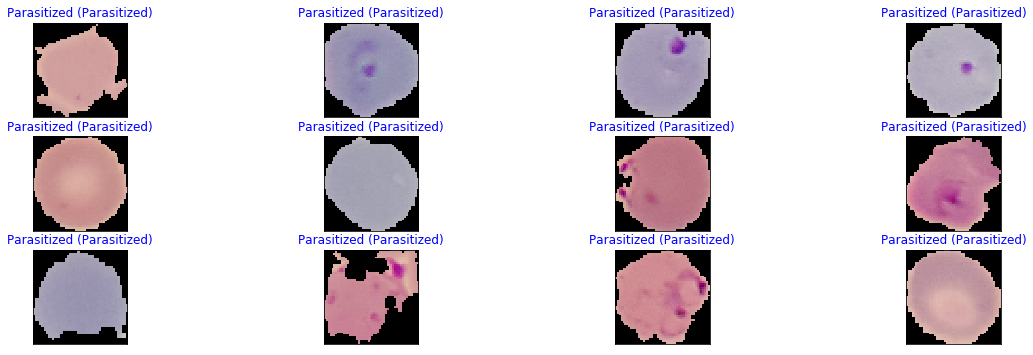

In [0]:
fig = plt.figure(figsize = (20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size = 12, replace = False)):
  ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_test[idx]))
  pred_idx = np.argmax(y_hat[idx])
  true_idx = np.argmax(y_test[idx])
  ax.set_title("{} ({})".format(malaria_labels[pred_idx], malaria_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "orange"))

In [0]:
# Without using ImageDataGenerator (just for the sake of random splitting)

from PIL import Image

data=[]
labels=[]
Parasitized=os.listdir("malaria-images/cell_images/Parasitized/")
for a in Parasitized:
    try:
        image=cv2.imread("cell_images/Parasitized/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Uninfected=os.listdir("malaria-images/cell_images/Uninfected/")
for b in Uninfected:
    try:
        image=cv2.imread("cell_images/Uninfected/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")